In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<AxesSubplot:title={'center':'Distribución de sentimientos'}>

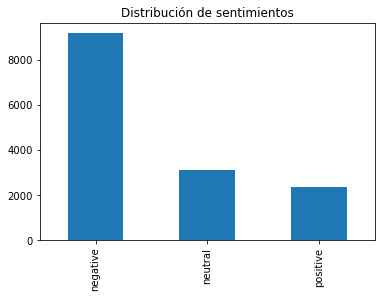

In [4]:
# Verificación de la distribución de sentimientos
df['airline_sentiment'].value_counts().plot(kind='bar', title='Distribución de sentimientos')

In [5]:
import re

def limpiar_texto(texto):
    texto = re.sub(r"http\S+", "", texto)  
    texto = re.sub(r"@\w+", "", texto)     
    texto = re.sub(r"#", "", texto)        
    texto = re.sub(r"[^a-zA-Z\s]", "", texto)  
    texto = texto.lower().strip()
    return texto

df['texto_limpio'] = df['text'].apply(limpiar_texto)


In [6]:
# Analisis de sentimiento con TextBlob
from textblob import TextBlob

def obtener_sentimiento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentimiento_textblob'] = df['texto_limpio'].apply(obtener_sentimiento)



In [7]:
from sklearn.metrics import classification_report

print(classification_report(df['airline_sentiment'], df['sentimiento_textblob']))


              precision    recall  f1-score   support

    negative       0.87      0.35      0.50      9178
     neutral       0.32      0.57      0.41      3099
    positive       0.32      0.74      0.45      2363

    accuracy                           0.46     14640
   macro avg       0.50      0.55      0.45     14640
weighted avg       0.67      0.46      0.47     14640



              precision    recall  f1-score   support

    negative       0.87      0.35      0.50      9178
     neutral       0.32      0.57      0.41      3099
    positive       0.32      0.74      0.45      2363

    accuracy                           0.46     14640
   macro avg       0.50      0.55      0.45     14640
weighted avg       0.67      0.46      0.47     14640



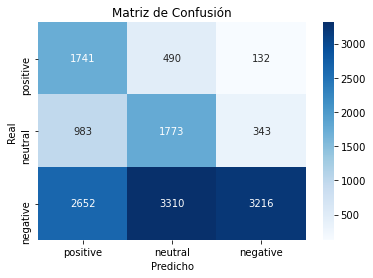

In [8]:
# Evaluar la precisión del análisis de sentimientos
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reporte de clasificación
print(classification_report(df['airline_sentiment'], df['sentimiento_textblob']))

# Matriz de confusión
cm = confusion_matrix(df['airline_sentiment'], df['sentimiento_textblob'], labels=['positive', 'neutral', 'negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


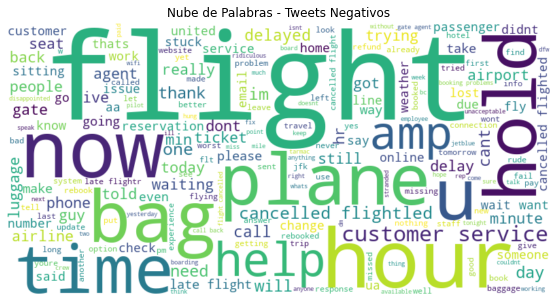

In [9]:
# Nube de palabras
from wordcloud import WordCloud

# Nube para sentimientos negativos
texto_neg = " ".join(df[df['airline_sentiment'] == 'negative']['texto_limpio'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(texto_neg)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Tweets Negativos')
plt.show()


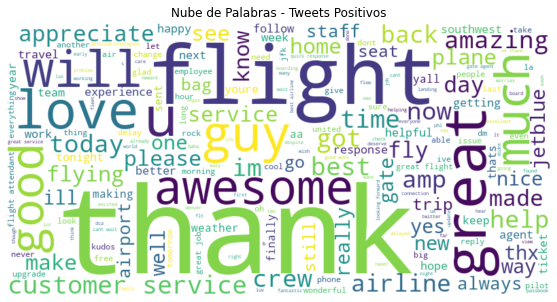

In [10]:
# WordCloud para positivos
texto_pos = " ".join(df[df['airline_sentiment'] == 'positive']['texto_limpio'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(texto_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Tweets Positivos')
plt.show()


In [11]:
df.to_csv("tweets_con_sentimiento.csv", index=False)
